# <center> Часть 1.
    Для начала рассмотрим датасет https://www.kaggle.com/drgilermo/nba-players-stats. 
    В нем представлена информация по игрокам в баскетбол, их рост, вес, дата рождения и тд.

In [113]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
#%pylab inline
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
import numpy as np

init_notebook_mode(connected=True)

In [114]:
df = pd.read_csv('data/player_data.csv')
print(df.shape)

(4550, 8)


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
name          4550 non-null object
year_start    4550 non-null int64
year_end      4550 non-null int64
position      4549 non-null object
height        4549 non-null object
weight        4544 non-null float64
birth_date    4519 non-null object
college       4248 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


Переведем строчный тип даты рождения игрока в более удобный datetime

In [116]:
df['birth_date'] =  pd.to_datetime(df['birth_date'], format='%B %d, %Y')
df['weight'] = df.weight.astype('float64')

Получим series cо всеми годами рождения игроков

In [117]:
years = pd.Series([x.year for x in df.birth_date]) 

Добавим новый series в dataframe

In [118]:
df = pd.concat([df, years.rename('years')], axis=1)

In [119]:
df = df.dropna()

Отфильтруем датасет по годам и найдем средний вес игроков для каждого года.

In [120]:
df1 = df[['weight', 'years']].groupby('years').mean()
df1.head()

,weight
years,
1913.0,192.500000
1914.0,165.000000
1915.0,194.000000
1916.0,186.714286
1917.0,200.181818


Постороим распределение среднего веса по годам рождения игроков,
используя встроенную функцию pandas plot() (библиотека matplotlib).
Выясним как менялся вес игроков в 20 веке, в зависимости от их года рождения.

Для этого удобно использовать обычный линейный график. Можно закрасить нижнюю часть с помощью kind='area' для, возможно, лучшего восприятия.

Text(0,0.5,'Средний вес')

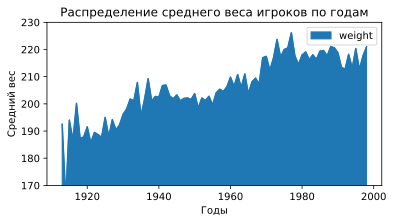

In [121]:
df1.plot(kind='area')
plt.ylim(bottom=170, top=230)
plt.title('Распределение cреднего веса игроков по годам')
plt.xlabel('Годы')
plt.ylabel('Средний вес')

Text(0,0.5,'Средний вес')

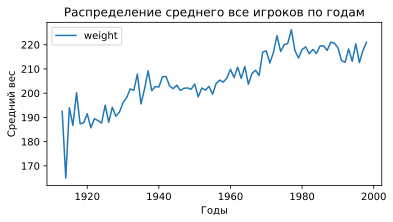

In [122]:
df1.plot()
plt.title('Распределение cреднего все игроков по годам')
plt.xlabel('Годы')
plt.ylabel('Средний вес')

Как видно, вес растет. Степень этого роста мы сможешь посмотреть позднее.

Теперь сделаем подобные графики для среднего роста игроков. (Для начала переведем их рост в удобный для анализа тип данных: из строчного в int и из американской системы единиц в метрическую)

In [123]:
height_cm = pd.Series([int(x.split('-')[0])*30.48 + int(x.split('-')[1])*2.54 for x in df.height])

In [124]:
df = pd.concat([df, height_cm.rename('height_cm')], axis=1)

In [125]:
df = df.dropna()
print(df.shape)

(3894, 10)


Сгруппируем по годам и найдем средний рост для каждого года.

In [126]:
df2 = df[['height_cm', 'years']].groupby('years').mean()
df2.head()

,height_cm
years,
1913.0,200.025000
1914.0,187.960000
1915.0,210.820000
1916.0,194.854286
1917.0,199.043636


Text(0,0.5,'Средний рост')

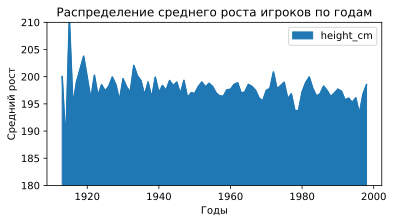

In [127]:
df2.plot(kind='area')
plt.ylim(bottom=180, top=210)
plt.title('Распределение cреднего роста игроков по годам')
plt.xlabel('Годы')
plt.ylabel('Средний рост')

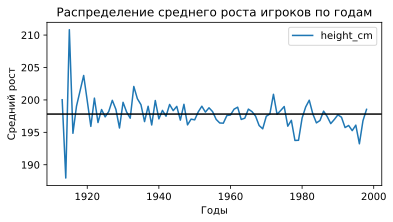

In [128]:
df2.plot()
plt.title('Распределение cреднего роста игроков по годам')
plt.xlabel('Годы')
plt.ylabel('Средний рост')
plt.axhline(df2.height_cm.mean(), color='k')

На втором графике добавили линию среднего роста, которая позволяет отметить как менялся рост относительно среднего за весь период. В данном случае, на глаз уже не заметна тенденция - уменьшается или увеличивает средний рост, поэтому воспользуемся библиотекой seaborn для получения более информативных графиков.

In [129]:
df2 = df2.reset_index()
df1 = df1.reset_index()

In [130]:
import numpy as np 
import seaborn as sns

Text(0.5,0.98,'Распределение cреднего роста игроков по годам')

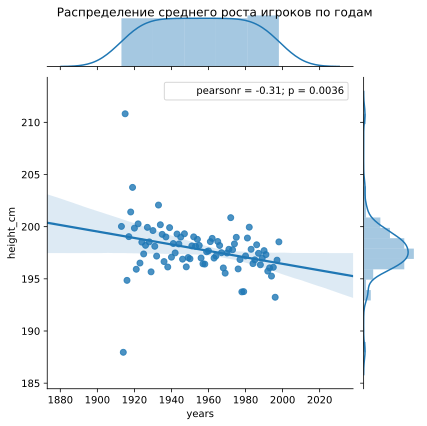

In [131]:
g = sns.jointplot(x='years', y='height_cm', data=df2, kind='reg')
g.fig.suptitle('Распределение cреднего роста игроков по годам')

Видно, что корреляционная прямая имеет отрицательную производную - это значит, что все-таки средний рост игроков уменьшался с годами. 

Text(0.5,0.98,'Распределение cреднего веса игроков по годам')

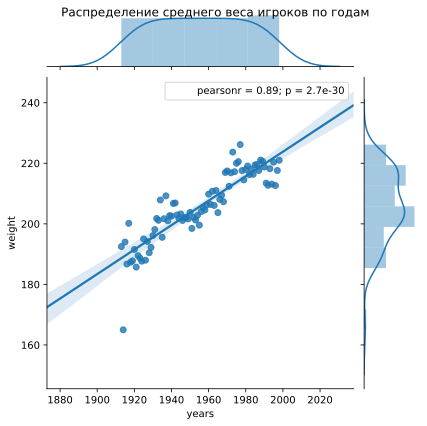

In [132]:
w = sns.jointplot(x='years', y='weight', data=df1, kind='reg')
w.fig.suptitle('Распределение cреднего веса игроков по годам')

Средний вес заметно рос.

# <center> Часть 2. 
    Теперь рассмотрим датасет https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016 со статистикой по самоубийствам в мире.

In [133]:
master = pd.read_csv('data/master.csv')
print(master.shape)

(27820, 12)


In [134]:
master.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


Сгрупируем по возрастным группам и просуммируем по количеству суицидов в каждой.

In [135]:
master_su = master[['age', 'suicides_no']].groupby('age').sum()
master_su

,suicides_no
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


Будем использовать график типа Bar, так как он удачно подходит для визуализации сравнения небольшого количества метрик без определенного порядка.

Также будем использовать библиотеку plotly.

In [136]:
trace0 = go.Bar(
    x=master_su.index,
    y=master_su.suicides_no,
    name='suicides_no'
)

data = [trace0]
layout = {'title': 'Total suicides from 1985 to 2016 by age group',
         'xaxis': {'title': 'Age group'},
         'yaxis': {'title': 'The number of suicides'}
}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Как видно, основное количество самоубийств приходиться на людей возрастной группы 35-54.  

Теперь посмотрим как менялось количество самоубийств по годам в каждой возрастной группе. Для этой соберем все в сводную таблицу.

In [137]:
suicides_by_age_group = master.pivot_table(
                        index='year', 
                        columns='age', 
                        values='suicides_no', 
                        aggfunc=sum).fillna(0).applymap(int)
suicides_by_age_group.head(3)

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
year,,,,,,
1985,17870,20771,35748,984,28736,11954
1986,18063,21685,37558,944,29760,12660
1987,16432,22309,40649,935,32469,14048


Изобразим результат для первых 10 лет с помощью heatmap, чтобы наглядно видеть изменение по годам. 

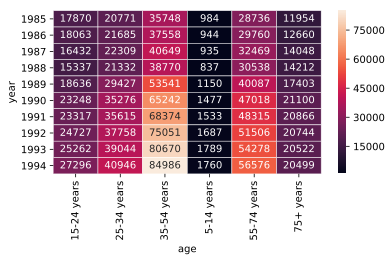

In [138]:
sns.heatmap(suicides_by_age_group.head(10), annot=True, fmt=".0f", 
            linewidths=0.5);

Как видно, количество самоубийств растет с каждым годом. (Вероятно, это связано с ростом населения Земли.)

Также с помощью heatmap удобно презентовать корреляции между различными величинами нашего датасета.

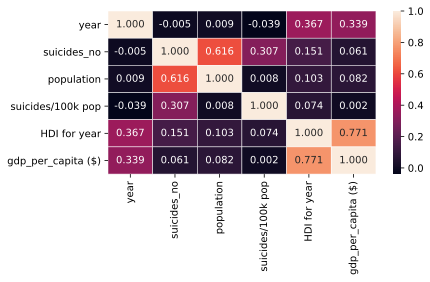

In [139]:
master.corr()
sns.heatmap(master.corr(), annot=True, fmt=".3f", 
            linewidths=0.5);

Как видно, можно видеть, что, действительно, есть серьезная корреляция между количеством людей и количество самоубийств (r = 0.616). Также имеет место положительная корреляция между ИЧР (HDI) и количеством самоубийств, что также может быть неочевидно.

Изпользуя функции, которые были у нас на занятии, можно реализовать визуализации как менялось количество самоубийств (и количество самоубийств на душу населения) по годам в каждой стране. В данном случае удобнее использовать простой линейный график.

In [140]:
def get_num_columns(dfs):
    if len(dfs) == 0:
        return 0
    return sum(list(map(lambda x: len(x.columns), dfs)))

def plotly_dropdown_line_plots(slices, title):
    slices_lst = list(slices.keys())
    N_slices = len(slices_lst)

    traces_dm = []
    buttons = []
    
    for i in range(N_slices):
        slice = slices_lst[i]
        df = slices[slice]
        
        dfs_before = list(slices.values())[:i]
        dfs_after = list(slices.values())[i+1:]

        num_before = get_num_columns(dfs_before)
        num_after = get_num_columns(dfs_after)
        
        for col in df.columns:
            traces_dm.append(
                go.Scatter(
                    x = df.index,
                    y = df[col],
                    name = col,
                    visible = (i == 0),
                    mode = 'lines'
                )
            )

        buttons.append(
            dict(
                label = slice,
                method = 'restyle',
                args = ['visible', [False]*num_before + [True]*len(df.columns) + [False]*num_after]
            )
        )
    layout = go.Layout(
        title = title,
        updatemenus = [
            dict(
                x = -0.05,
                y = 1,
                yanchor = 'top',
                buttons = buttons,
            )
        ]
    )
    fig = go.Figure(data=traces_dm, layout=layout)
    iplot(fig, show_link=False)

In [141]:
suicide_by_country = {}

In [142]:
for country in master.country.unique():
    suicide_by_country[country] = master[master.country == country][['year','suicides/100k pop']].groupby('year').sum()

In [143]:
plotly_dropdown_line_plots(suicide_by_country, title = 'Suicides per 100,000 population by year')

Например, для Германии видно серьезное уменьшение количества самоубийств на 100к населения.

Теперь рассмотрим абсолютное количество самоубийств по каждой стране.

In [144]:
suicide_by_country = {}

In [145]:
for country in master.country.unique():
    suicide_by_country[country] = master[master.country == country][['year','suicides_no']].groupby('year').sum()

In [146]:
plotly_dropdown_line_plots(suicide_by_country, title = 'Suicide rate in a particular country by year')

Например, видно, что для России был серьезный рост абсолютного количества самоубийств в 90-ые, после 1999 года происходит уменьшение этого показателя. 

# <center> Часть 3.
    Будем использовать датасет https://www.kaggle.com/fernandol/countries-of-the-world, в котором содержится различная информация по странам мира. Например, их площадь, население, ВВП и тд.

In [147]:
countries = pd.read_csv('data/countries of the world.csv')
print(countries.shape)
countries.head(3)

(227, 20)


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"


Выберем только страны региона Восточной Европы и оставим только столбцы с названием страны, населением, площадью, и ВВП на душу населения.

In [148]:
countries_in_europe = countries[(countries['Region'] == 'EASTERN EUROPE                     ')]
countries_in_europe = countries_in_europe[['Country', 'Population', 'Area (sq. mi.)', 'GDP ($ per capita)']]

In [149]:
countries_in_europe.head(5)

,Country,Population,Area (sq. mi.),GDP ($ per capita)
1,Albania,3581655,28748,4500.0
25,Bosnia & Herzegovina,4498976,51129,6100.0
30,Bulgaria,7385367,110910,7600.0
50,Croatia,4494749,56542,10600.0
53,Czech Republic,10235455,78866,15700.0


У нас имеется 4 параметра: название страны, ее население, площадь и ВВП на душу населения. Для того, чтобы изобразить их все, будем использовать Scatter с цветными окружностями. Где по оси х будет отложено население страны, по оси у ВВП на душу населения, размер окружности будет задавать площадь страны, а цвет и надпись будет говорить о названии страны. Используем опять же библиотеку plotly.

In [150]:
trace = go.Scatter(
    x=countries_in_europe.Population,
    y=countries_in_europe['GDP ($ per capita)'],
    mode = 'markers+text',
    text = countries_in_europe.Country,
    marker = dict(
        size = 1/2000*countries_in_europe['Area (sq. mi.)'],
        color = list(range(0,len(countries_in_europe.Country.unique())))
    )
)

data = [trace]

layout = go.Layout(
    title = 'Statistics for Eastern Europe',
    xaxis=dict(
        autorange=True,
        title='Population',
    ),
    yaxis=dict(
        autorange=True,
        title='GDP ($ per capita)'
    ))
    
fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)


Можно видеть, что Словения является самой богатой страной Восточной Европы, но при этом самой маленькой и по площади и по населению, а, например, Польша является средней по такому показателю как ВВП на душу населения, но самой большой по площади и по населению. (В данном датасете страны бывшего СССР не вошли в регион "Восточная Европа").